# <font color=darkcyan> Multivariate linear regression - Lasso </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
from sklearn.metrics import mean_squared_error

It is assumed that for all $1\leqslant i \leqslant n$, 

$$
Y_i = X^\top_i \beta_{\star} + \varepsilon_i\,,
$$

where the $(\varepsilon_i)_{1\leqslant i\leqslant n}$ are i.i.d. random variables in $\mathbb{R}$, $X_i\in\mathbb{R}^d$ and $\beta_{\star}$ is an unknown vector in $\mathbb{R}^d$. Let $Y\in\mathbb{R}^n$ (resp. $\varepsilon\in\mathbb{R}^n$)  be the random vector such that  for all $1\leqslant i \leqslant n$, the $i$-th component of $Y$ (resp. $\varepsilon$) is $Y_i$ (resp. $\varepsilon_i$) and $X\in\mathbb{R}^{n\times d}$ the matrix with line $i$ equal to $X^\top_i$. The model is then written

$$
Y = X \beta_{\star} + \varepsilon\,.
$$

In this section, it is assumed that $\mathbb{E}[\varepsilon] = 0$ and $\mathbb{E}[\varepsilon \varepsilon^\top] = \sigma_{\star}^2 I_n$. The Lasso estimate of $\beta_{\star}$ is defined as a solution to

$$
\widehat \beta_n\in  \mathrm{argmin}_{\beta\in\mathbb{R}^d}\,\left( n^{-1}\|Y - X\beta\|_2^2 + \lambda \|\beta\|_1\right)\,,
$$

where $\lambda>0$.

A coordinate descent can be applied to solve the LASSO optimization problem. In this case, solving the Lasso optimization problem amounts to producing iterative estimators, where at each iteration, a coordinate is selected to be updated. Then, the objective function  is optimized explicitly  with respect to the selected coordinate. For all $\beta \in \mathbb{R}^d$,  
$$
\nabla_\beta \|Y - X\beta\|_2^2 = - 2 X^\top (Y-X\beta)\,.
$$
Then, for all $1\leqslant j \leqslant d$, $(\nabla_\beta \|Y - X\beta\|_2^2)_j = -2 {\bf X}^\top_j (Y-X\beta)$, where ${\bf X}_j$ is the $j$-th column of the matrix $X$. 
Define, for all $1\leqslant j \leqslant d$,
$$
\upsilon_{j}={\bf X}^\top_{j}\left(Y-\sum_{\substack{i=1\\ i\neq j}}^d\beta_{i}{\bf X}_{i}\right)\,.
$$
Assuming that the columns of $X$ are normalized, i.e. for all $1\leqslant k \leqslant d$, ${\bf X}^\top_{k}{\bf X}_{k}=1$, yields
$$
(\nabla_\beta \|Y - X\beta\|_2^2)_j = -2( \upsilon_j - \beta_j)\,.
$$
Consequently, for all $\beta_j \neq 0$, 
$$
(\nabla_\beta ( n^{-1}\|Y - X\beta\|_2^2 +  \lambda\|\beta\|_1))_j= \frac{2}{n}( \beta_j - \upsilon_j + \lambda n\textrm{sign}(\beta_j)/2)\,.
$$
For all $1\leqslant j\leqslant d$,  $\beta_j \mapsto  n^{-1}\|Y - X\beta\|_2^2 + \lambda\|\beta\|_1$ is convex and grows to infinity when $|\beta_j|\to \infty$ and admits thus a minimum at some $\beta_j^{\star}\in\mathbb{R}$. 

- If $\beta_j^{\star} \neq 0$, then
$$
\beta_j^{\star} = \upsilon_j\left( 1 - \frac{\lambda n~\textrm{sign}(\beta_j^{\star})}{2 \upsilon_j}\right)\,,
$$
which yields, as  $\textrm{sign}(\beta_j^{\star}) = \textrm{sign}(\upsilon_j)$,
$$
\beta_j^{\star} = \upsilon_j\left(1 - \frac{\lambda n }{2 |\upsilon_j|}\right)
$$
and
$$
1 - \frac{\lambda n }{2 |\upsilon_j|} \geqslant 0\,.
$$
- If $1 - \lambda n/(2 |\upsilon_j|)<0$, there is no solution to $(\nabla_\beta ( n^{-1}\|Y - X\beta\|_2^2 +  \lambda\|\beta\|_1))_j=0$ for $\beta_j \neq 0$.  Since $\beta_j \mapsto  n^{-1}\|Y - X\beta\|_2^2 + \lambda\|\beta\|_1$ admits a minimum, $\beta_j^{\star}=0$. 
Therefore,
$$
\beta_j^{\star} = \upsilon_j\left( 1 - \frac{\lambda n}{2 |\upsilon_j|}\right)_+ = \mathrm{max}\left(0;\upsilon_j\left( 1 - \frac{\lambda n}{2 |\upsilon_j|}\right)\right)\,.
$$

As a conlusion:
- if $|\upsilon_j|\geq \lambda n / 2$, $\beta_j^{\star} = \upsilon_j( 1 - \frac{\lambda n}{2 |\upsilon_j|})$ and if $|\upsilon_j|< \lambda n / 2$, $\beta_j^{\star} = 0$.

$$
\beta_j^{\star} = \begin{cases}
\upsilon_j + \frac{\lambda n}{2} & \text{if } \upsilon_j\leq -\lambda n / 2, \\
\upsilon_j - \frac{\lambda n}{2} & \text{if } \upsilon_j\geq \lambda n / 2, \\
0 & \text{otherwise}. \\
\end{cases}
$$

#### Import data

In [2]:
import pandas as pd

In [3]:
# In this section, multivariate linear regression is used to predic the Brazilian inflation based on
# many observed variables, see https://github.com/gabrielrvsc/HDeconometrics/
df = pd.read_csv('BRinf.txt')
df.head()

,Unnamed: 0,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2003-01-31,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,2003-02-28,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,2003-03-31,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,2003-04-30,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,2003-05-31,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [4]:
# number of observations, number of variables
df.shape

(156, 93)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df.iloc[:,2:])

In [6]:
# first coordinate is the number of samples
# second coordinate is the number of input features (+ 1 for the observations)
np.shape(X)

(156, 91)

In [7]:
nb_data_train = 140
# inflation observations
Y_train = df.iloc[:nb_data_train,1] 
Y_test  = df.iloc[nb_data_train:,1] 
Y_test.head()

140    0.57
141    0.42
142    0.51
143    0.78
144    1.24
Name: Brazil CPI IPCA MoM, dtype: float64

In [8]:
# other variables
X_train = X[:nb_data_train,:] 
X_test  = X[nb_data_train:,:] 
np.shape(X_train)

(140, 91)

#### Lasso Regression from scractch

In [9]:
def threshold_func(z,alpha):
    if z < - alpha:
        return (z + alpha)
    elif z >  alpha:
        return (z - alpha)
    else: 
        return 0

To make things simpler, you can write the function with $\alpha = \lambda n /2$ in the mathematical derivation above.

In [10]:
def coordinate_descent_lasso(beta, X, y, alpha, n_iter):
    n,d = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) 
    for i in range(n_iter): 
        for j in range(d):
            X_j = X[:,j]
            y_pred = X @ beta
            v_j = X_j.T @ (y - y_pred  + beta[j]*X_j)  #v_j = np.sum(X_j*(y - y_pred  + beta[j]*X_j))
            beta[j] =  threshold_func(v_j, alpha)         
    return beta

In [11]:
beta = np.zeros(X_train.shape[1])
lambda_ = 0.001
alpha = lambda_*X_train.shape[0]/2
n_iter = 1000
coordinate_descent_lasso(beta,X_train,Y_train,alpha,n_iter)

array([ 0.        ,  0.        ,  0.        , -0.47112115,  1.59630428,
        0.38361648, -0.09015967,  0.        ,  0.33643184,  0.        ,
       -1.00818036,  0.59459696,  0.        ,  0.        , -0.19352409,
        0.        ,  0.12962591, -0.27942886,  1.17922152,  0.        ,
        0.18431525,  0.        , -0.4259526 , -0.02100771,  0.        ,
        4.19484732, -0.3577798 ,  0.        ,  0.        , -0.54280604,
       -1.1817891 , -0.04707955, -3.92123729,  0.        ,  0.        ,
        0.        ,  0.        , -0.65692109, -0.14119846,  0.        ,
       -1.55234161,  0.        , -0.9914556 , -0.26270632,  1.56910694,
       -6.07087345,  1.37971767,  0.72723804, -0.50350902,  0.        ,
        0.        ,  0.        ,  0.86394651, -0.01974766,  0.30979853,
        0.8113343 ,  0.        ,  0.1984641 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [12]:
alpha = 1
beta = np.zeros(X_train.shape[1])

beta_final = coordinate_descent_lasso(beta, X_train, Y_train, alpha, n_iter)
num_zero_coefs = np.sum(beta_final == 0)
y_pred = np.dot(X_test, beta_final)
mse = mean_squared_error(Y_test, y_pred)

print(f"For alpha = {alpha}:")
print(f"Number of zero coefficients: {num_zero_coefs}")
print(f"MSE on test set: {mse}")

For alpha = 1:
Number of zero coefficients: 88
MSE on test set: 13.429653229359666


#### Lasso Regression with Sklearn

In [13]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [14]:
n_alphas = 100
alphas = np.logspace(-10, 1, n_alphas)

In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [16]:
lasso = Lasso(max_iter=10000)  
coefs = []
nb_zeros = []
rmse = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    nb_zeros.append(np.count_nonzero(lasso.coef_==0))
    y_hat = lasso.predict(X_test)
    rmse.append(mean_squared_error(y_hat,Y_test.values))

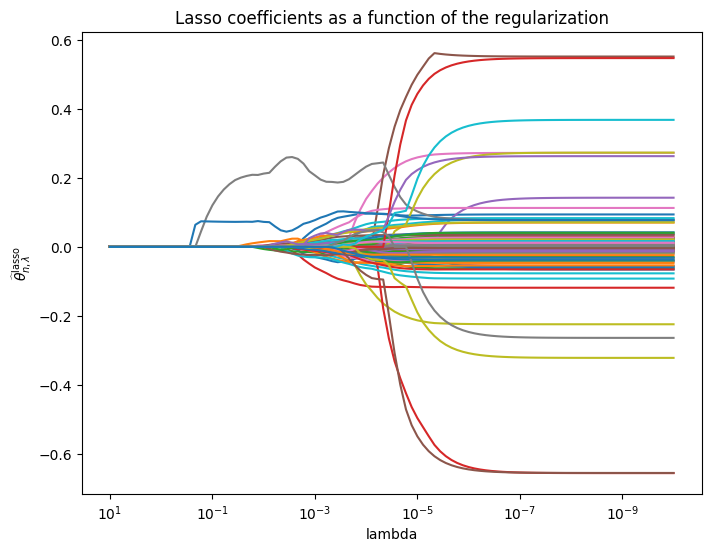

In [17]:
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel(r'$\widehat\theta^{\mathrm{lasso}}_{n,\lambda}$')
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

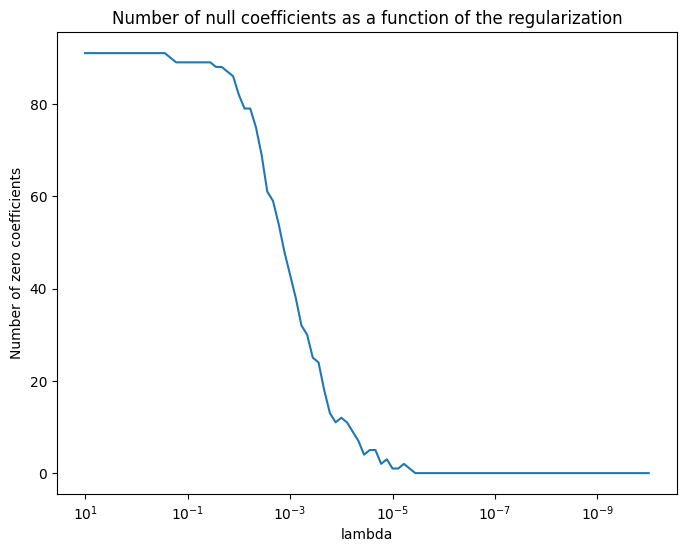

In [18]:
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, nb_zeros)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Number of zero coefficients')
plt.title("Number of null coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

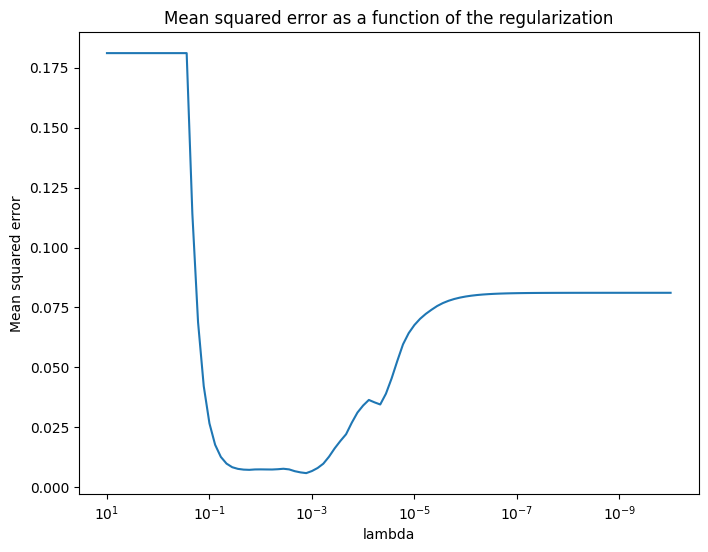

In [19]:
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, rmse)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Mean squared error')
plt.title("Mean squared error as a function of the regularization")
plt.axis("tight")
plt.show()